In [95]:
# Importing libraries
import pandas as pd

# Import the dataset

df = pd.read_csv("online_retail_09_10.csv", encoding="ISO-8859-1")

#shape the Column and Rows
print("Shape", df.shape)
print("Columns", df.columns.tolist())

# Head
df.head

Shape (525461, 8)
Columns ['ï»¿InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


<bound method NDFrame.head of        ï»¿InvoiceNo StockCode                          Description  Quantity  \
0            489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1            489434    79323P                   PINK CHERRY LIGHTS        12   
2            489434    79323W                  WHITE CHERRY LIGHTS        12   
3            489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4            489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...             ...       ...                                  ...       ...   
525456       538171     22271                 FELTCRAFT DOLL ROSIE         2   
525457       538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
525458       538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
525459       538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
525460       538171     21931               JUMBO STORAGE BAG SUKI         2   

         

In [70]:
## STEP 2 ##

# Info about columns (types, nulls)
df.info()

# Quick stats for numeric columns
df.describe()

# Missing values per column
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ï»¿InvoiceNo  525461 non-null  object 
 1   StockCode     525461 non-null  object 
 2   Description   522533 non-null  object 
 3   Quantity      525461 non-null  int64  
 4   InvoiceDate   525461 non-null  object 
 5   UnitPrice     525461 non-null  float64
 6   CustomerID    417534 non-null  float64
 7   Country       525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


ï»¿InvoiceNo         0
StockCode            0
Description       2928
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID      107927
Country              0
dtype: int64

In [71]:
# Rename the column by removing the BOM character 'ï»¿'
df.rename(columns={'ï»¿InvoiceNo':'InvoiceNo'}, inplace= True)

# Re-check to confirm the change.
print(df.columns.tolist())

['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']


In [72]:
## Convert Data-types ##

# 1. Object --> datetime
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'], errors='coerce')

# 2. CustomeID --> Intger (nullable , Allows NaNs)
df['CustomerID'] = df['CustomerID'].astype('Int64')

# Re-check the changes made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   UnitPrice    525461 non-null  float64       
 6   CustomerID   417534 non-null  Int64         
 7   Country      525461 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 32.6+ MB


In [73]:
## STEP 3 (Basic Validation) ##

# Check for any rows with invalid/missing InvoiceDate after conversion
df['InvoiceDate'].isna().sum()

# Check for negative or zero prices/quantities
print("Negative quantities:", (df['Quantity'] < 0).sum())
print("Zero/negative prices:", (df['UnitPrice'] <= 0).sum())


Negative quantities: 12326
Zero/negative prices: 3690


In [74]:
## Data Cleanig and Processing ##

# 1. filter out rows with unit price <= 0
df =df[df['UnitPrice']>0]


# Drop missing descriptions
df = df.dropna(subset=['Description'])

# Add revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']


In [75]:
# 1. Sales-only dataset (exclude returns)
df_sales = df[df['Quantity'] > 0].copy()

# 2. Full dataset with returns (for net revenue analysis)
df_net = df.copy()

print("Sales-only shape:", df_sales.shape)
print("Net dataset shape:", df_net.shape)


Sales-only shape: (511566, 9)
Net dataset shape: (521771, 9)


In [96]:
## Handle the missing Values
# Missing descriptions are usually tied to special StockCodes

for dataset in [df_sales, df_net]:
    # Month column for monthly aggregation
    dataset['Month'] = dataset['InvoiceDate'].dt.to_period('M')
    
    # Absolute quantity column (for popularity)
    dataset['QuantityAbs'] = dataset['Quantity'].abs()


In [77]:
## Checking the impact of returns. ##

returns_revenue = df_net[df_net['Quantity'] < 0]['Revenue'].sum()
sales_revenue   = df_sales['Revenue'].sum()
print("Revenue lost to returns: £", round(abs(returns_revenue), 2))
print("Net revenue after returns: £", round(sales_revenue + returns_revenue, 2))

Revenue lost to returns: £ 630228.94
Net revenue after returns: £ 9676036.65


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 521771 entries, 0 to 525460
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    521771 non-null  object        
 1   StockCode    521771 non-null  object        
 2   Description  521771 non-null  object        
 3   Quantity     521771 non-null  int64         
 4   InvoiceDate  521771 non-null  datetime64[ns]
 5   UnitPrice    521771 non-null  float64       
 6   CustomerID   417503 non-null  Int64         
 7   Country      521771 non-null  object        
 8   Revenue      521771 non-null  float64       
dtypes: Int64(1), datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 40.3+ MB


In [79]:
#This will give us 
 # 'df_sales vs. df_net'
 # Total revenve even after the months.
 # percentage of returns with amount as well.

# Compare sales-only vs net dataset
print("Shape of sales-only df:", df_sales.shape)
print("Shape of net df (with returns):", df_net.shape)

# Calculate sales and returns impact
sales_revenue   = df_sales['Revenue'].sum()
returns_revenue = df_net[df_net['Quantity'] < 0]['Revenue'].sum()  # will be negative
net_revenue     = sales_revenue + returns_revenue

# Percentage of revenue lost to returns
returns_pct = (abs(returns_revenue) / sales_revenue) * 100

print(f"Total sales revenue (before returns): £{sales_revenue:,.2f}")
print(f"Revenue lost to returns: £{abs(returns_revenue):,.2f} ({returns_pct:.2f}%)")
print(f"Net revenue (after returns): £{net_revenue:,.2f}")


Shape of sales-only df: (511566, 11)
Shape of net df (with returns): (521771, 11)
Total sales revenue (before returns): £10,306,265.59
Revenue lost to returns: £630,228.94 (6.12%)
Net revenue (after returns): £9,676,036.65


In [97]:
## Top 10 Most Sold Products (by Quantity)

import plotly.express as px

import plotly.express as px

# -------------------------
# Data Prep
# -------------------------
# Revenue column
df_net["Revenue"] = df_net["Quantity"] * df_net["UnitPrice"]

# Extract Month (convert to datetime for plotly)
df_net["Month"] = df_net["InvoiceDate"].dt.to_period("M").dt.to_timestamp()

# Total revenue for % calc
total_revenue = df_net["Revenue"].sum()
total_quantity = df_net["Quantity"].sum()

In [81]:

# -------------------------
# Most sold product by month
# -------------------------
monthly_top = (
    df_net.groupby(["Month", "Description"], as_index=False)["Quantity"]
    .sum()
    .sort_values(["Month", "Quantity"], ascending=[True, False])
)

monthly_top = monthly_top.loc[monthly_top.groupby("Month")["Quantity"].idxmax()]

fig1 = px.bar(
    monthly_top,
    x="Month",
    y="Quantity",
    color="Description",
    title="Most Sold Product by Month",
    labels={"Quantity": "Units Sold", "Month": "Month"},
)
fig1.show()

In [82]:
# -------------------------
# Most sold product by country
# -------------------------
country_top = (
    df_net.groupby(["Country", "Description"], as_index=False)["Quantity"]
    .sum()
    .sort_values(["Country", "Quantity"], ascending=[True, False])
)

country_top = country_top.loc[country_top.groupby("Country")["Quantity"].idxmax()]

fig2 = px.bar(
    country_top,
    x="Country",
    y="Quantity",
    color="Description",
    title="Most Sold Product by Country",
    labels={"Quantity": "Units Sold"},
)
fig2.show()

In [83]:
# -------------------------
# Product generating the most revenue
# -------------------------
product_revenue = (
    df_net.groupby("Description", as_index=False)["Revenue"]
    .sum()
    .sort_values("Revenue", ascending=False)
)

top_product = product_revenue.iloc[0]
top_product_share = (top_product["Revenue"] / total_revenue) * 100

fig3 = px.bar(
    product_revenue.head(10),
    x="Description",
    y="Revenue",
    title="Top 10 Products by Revenue",
    labels={"Revenue": "Revenue (£)", "Description": "Product"},
    hover_data={"Revenue": ":,.2f"}
)
fig3.show()
# Pie chart for product revenue share
fig3_pie = px.pie(
    names=["Top Product", "Others"],
    values=[top_product["Revenue"], total_revenue - top_product["Revenue"]],
    title=f"Revenue Share: {top_product['Description']} vs Others",
    hole=0.4
)
fig3_pie.show()


In [84]:
# -------------------------
# Country generating the most revenue
# -------------------------
country_revenue = (
    df_net.groupby("Country", as_index=False)["Revenue"]
    .sum()
    .sort_values("Revenue", ascending=False)
)

top_country = country_revenue.iloc[0]
top_country_share = (top_country["Revenue"] / total_revenue) * 100

fig4 = px.bar(
    country_revenue.head(10),
    x="Country",
    y="Revenue",
    title="Top 10 Countries by Revenue",
    labels={"Revenue": "Revenue (£)"},
    hover_data={"Revenue": ":,.2f"}
)
fig4.show()

# Pie chart for country revenue share
fig4_pie = px.pie(
    names=[top_country["Country"], "Others"],
    values=[top_country["Revenue"], total_revenue - top_country["Revenue"]],
    title=f"Revenue Share: {top_country['Country']} vs Others",
    hole=0.4
)
fig4_pie.show()

In [85]:
# -------------------------
# Top 10 most selling products (by quantity)
# -------------------------
top10_products = (
    df_net.groupby("Description", as_index=False)["Quantity"]
    .sum()
    .sort_values("Quantity", ascending=False)
    .head(10)
)

# Add % share
top10_products["Share_%"] = (top10_products["Quantity"] / total_quantity) * 100

fig5 = px.bar(
    top10_products,
    x="Description",
    y="Quantity",
    title="Top 10 Most Sold Products (by Quantity)",
    labels={"Quantity": "Units Sold", "Description": "Product"},
    hover_data={"Share_%": ":.2f"}
)
fig5.show()


In [86]:
# -------------------------
# Monthly revenue trend
# -------------------------
monthly_revenue = (
    df_net.groupby("Month", as_index=False)["Revenue"]
    .sum()
    .sort_values("Month")
)

fig6 = px.line(
    monthly_revenue,
    x="Month",
    y="Revenue",
    title="Monthly Revenue Trend",
    labels={"Revenue": "Revenue (£)", "Month": "Month"},
    markers=True
)
fig6.show()

In [87]:
# -------------------------
# Print key highlights
# -------------------------
print(f"Top product overall by revenue: {top_product['Description']} (£{top_product['Revenue']:.2f}) "
      f"=> {top_product_share:.2f}% of total revenue")

print(f"Top country overall by revenue: {top_country['Country']} (£{top_country['Revenue']:.2f}) "
      f"=> {top_country_share:.2f}% of total revenue")

print(f"Total Revenue: £{total_revenue:,.2f}")

Top product overall by revenue: REGENCY CAKESTAND 3 TIER (£163051.46) => 1.69% of total revenue
Top country overall by revenue: United Kingdom (£8331329.55) => 86.10% of total revenue
Total Revenue: £9,676,036.65


In [88]:
## Level 5: Advanced Customer & Revenue Analytics  
# We tackle three major pillars:  

# 1. **RFM Segmentation (Recency-Frequency-Monetary):**  
# 2. **Cohort Analysis (Retention):**  
# 3. **Revenue Forecasting:**  

# **Why this matters:**  
# - This step transforms the project from a beginner sales report into an advanced, business-ready toolkit.  
# - Stakeholders gain visibility into *who their customers are*, *how loyal they remain*, and *where revenue is heading*.  
# - By combining behavioral segmentation, retention dynamics, and forecasting, we enable not just reporting but **actionable strategy**.  


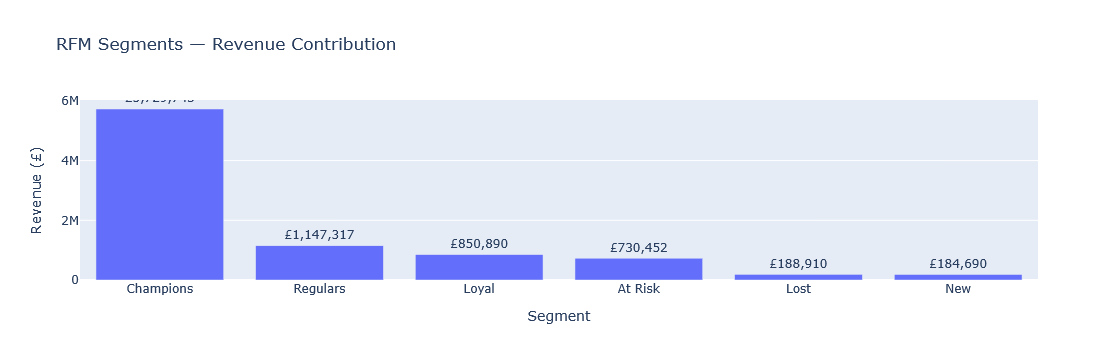

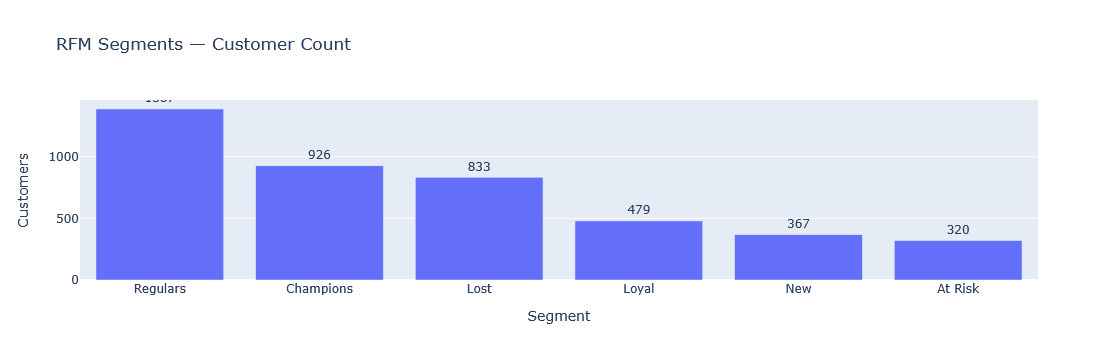

RFM — top rows:


,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Segment
0,12346,165,11,372.86,2,5,2,252,At Risk
1,12347,3,2,1323.32,5,2,4,524,New
2,12348,74,1,222.16,2,1,1,211,Lost
3,12349,43,3,2671.14,3,3,5,335,Regulars
4,12351,11,1,300.93,5,1,2,512,New


In [94]:
# =========================
# ADVANCED ANALYSIS
# RFM Segmentation + Cohort Retention + Forecasting
# Requirements: pandas, numpy, plotly, statsmodels
# Assumes you already have: df_sales (quantity>0) and df_net (returns kept)
# =========================

import numpy as np
from datetime import timedelta

# ---------- Safety checks / prep ----------
# Ensure datetime + Month columns exist
for _df in [df_sales, df_net]:
    if not np.issubdtype(_df['InvoiceDate'].dtype, np.datetime64):
        _df['InvoiceDate'] = pd.to_datetime(_df['InvoiceDate'], errors='coerce')
    if 'Revenue' not in _df.columns:
        _df['Revenue'] = _df['Quantity'] * _df['UnitPrice']

# Month (timestamp) for time series / cohorts
df_sales['Month'] = df_sales['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
df_net['Month']   = df_net['InvoiceDate'].dt.to_period('M').dt.to_timestamp()

# =========================
# 1) RFM SEGMENTATION (on df_sales, excludes returns)
# =========================
# Use only rows with a known customer
df_rfm_base = df_sales.dropna(subset=['CustomerID']).copy()

# Reference date = one day after the last invoice (so recency=0 for last-day buyers)
ref_date = df_rfm_base['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm = (
    df_rfm_base
    .groupby('CustomerID')
    .agg(
        Recency=('InvoiceDate', lambda x: (ref_date - x.max()).days),
        Frequency=('InvoiceNo', 'nunique'),
        Monetary=('Revenue', 'sum'),
    )
    .reset_index()
)

# Score each dimension by quantiles (higher is better except Recency)
# Using quintiles (1..5). Adjust to terciles (1..3) if your data is sparse.
rfm['R_Score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)  # lower recency -> higher score
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_Score'] = rfm['R_Score']*100 + rfm['F_Score']*10 + rfm['M_Score']  # e.g., 555 best

# Simple segment mapping (keep it readable & beginner friendly)
def segment_map(r,f,m):
    if r>=4 and f>=4 and m>=4:
        return 'Champions'
    if r>=3 and f>=4:
        return 'Loyal'
    if r>=4 and f<=2:
        return 'New'
    if r<=2 and f>=4:
        return 'At Risk'
    if r<=2 and f<=2 and m<=2:
        return 'Lost'
    return 'Regulars'

rfm['Segment'] = rfm[['R_Score','F_Score','M_Score']].apply(lambda s: segment_map(*s), axis=1)

# Segment summary
segment_summary = (
    rfm.groupby('Segment')
       .agg(
           Customers=('CustomerID', 'count'),
           Avg_Recency=('Recency','mean'),
           Avg_Frequency=('Frequency','mean'),
           Revenue=('Monetary','sum')
       )
       .sort_values('Revenue', ascending=False)
       .reset_index()
)

# Plot: segment revenue contribution
fig_rfm_rev = px.bar(
    segment_summary,
    x='Segment', y='Revenue',
    title='RFM Segments — Revenue Contribution',
    text='Revenue', labels={'Revenue': 'Revenue (£)'}
)
fig_rfm_rev.update_traces(texttemplate='£%{text:,.0f}', textposition='outside')
fig_rfm_rev.show()

# Plot: segment sizes
fig_rfm_size = px.bar(
    segment_summary.sort_values('Customers', ascending=False),
    x='Segment', y='Customers',
    title='RFM Segments — Customer Count',
    text='Customers'
)
fig_rfm_size.update_traces(textposition='outside')
fig_rfm_size.show()

print("RFM — top rows:")
display(rfm.head())

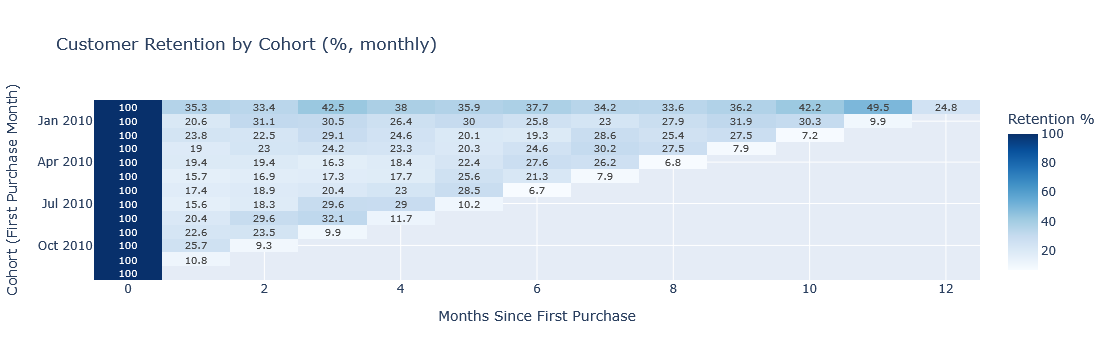

Cohort retention (%):


CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2009-12-01,100.0,35.3,33.4,42.5,38.0,35.9,37.7,34.2,33.6,36.2,42.2,49.5,24.8
2010-01-01,100.0,20.6,31.1,30.5,26.4,30.0,25.8,23.0,27.9,31.9,30.3,9.9,
2010-02-01,100.0,23.8,22.5,29.1,24.6,20.1,19.3,28.6,25.4,27.5,7.2,,
2010-03-01,100.0,19.0,23.0,24.2,23.3,20.3,24.6,30.2,27.5,7.9,,,
2010-04-01,100.0,19.4,19.4,16.3,18.4,22.4,27.6,26.2,6.8,,,,
2010-05-01,100.0,15.7,16.9,17.3,17.7,25.6,21.3,7.9,,,,,
2010-06-01,100.0,17.4,18.9,20.4,23.0,28.5,6.7,,,,,,
2010-07-01,100.0,15.6,18.3,29.6,29.0,10.2,,,,,,,
2010-08-01,100.0,20.4,29.6,32.1,11.7,,,,,,,,


In [90]:
# =========================
# 2) COHORT ANALYSIS (retention)
# =========================
# Cohort month = first purchase month of each customer
cohort_df = df_rfm_base[['CustomerID','InvoiceDate']].copy()
cohort_df['InvoiceMonth'] = cohort_df['InvoiceDate'].values.astype('datetime64[M]')  # normalize to month start

first_purchase = (
    cohort_df.groupby('CustomerID')['InvoiceMonth'].min()
             .rename('CohortMonth')
)

cohort_df = cohort_df.join(first_purchase, on='CustomerID')

# Cohort index = months since first purchase (0,1,2,...)
def months_between(end, start):
    return (end.year - start.year) * 12 + (end.month - start.month)

cohort_df['CohortIndex'] = cohort_df.apply(
    lambda r: months_between(r['InvoiceMonth'], r['CohortMonth']),
    axis=1
)

# Build retention matrix: unique customers per (CohortMonth, CohortIndex)
cohort_pivot = (
    cohort_df.groupby(['CohortMonth','CohortIndex'])['CustomerID']
             .nunique()
             .reset_index()
             .pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
)

# Convert to retention rates (divide by cohort size at index 0)
cohort_sizes = cohort_pivot[0]
retention = cohort_pivot.divide(cohort_sizes, axis=0).round(3) * 100

# Heatmap
fig_cohort = px.imshow(
    retention,
    text_auto=True,
    aspect='auto',
    color_continuous_scale='Blues',
    labels=dict(color='Retention %'),
    title='Customer Retention by Cohort (%, monthly)'
)
fig_cohort.update_xaxes(title='Months Since First Purchase')
fig_cohort.update_yaxes(title='Cohort (First Purchase Month)')
fig_cohort.show()

print("Cohort retention (%):")
display(retention.fillna(''))

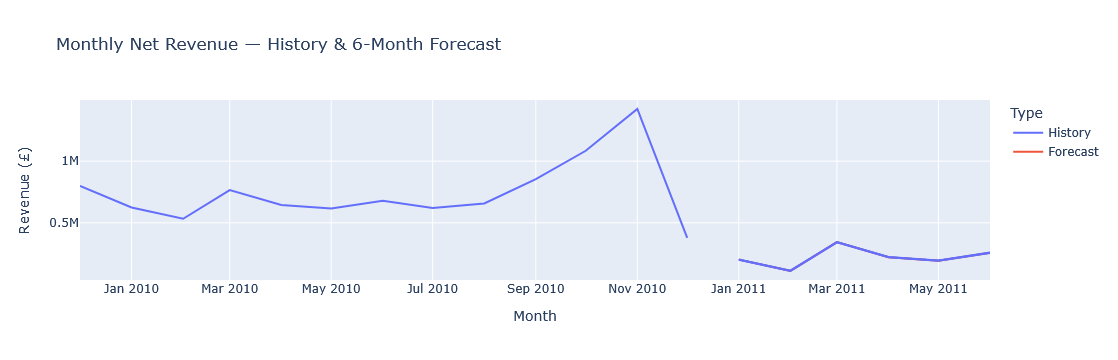

In [91]:
# =========================
# 3) FORECASTING Monthly Net Revenue (includes returns)
# =========================
# Aggregate net revenue monthly
ts = (
    df_net.groupby('Month', as_index=False)['Revenue']
          .sum()
          .sort_values('Month')
          .set_index('Month')['Revenue']
)

# Ensure monthly frequency
ts = ts.asfreq('MS')  # Month Start
ts = ts.fillna(0.0)

order = (1,1,1)
seasonal_order = (1,1,1,12)

# Forecast next 6 months
steps = 6
fcast = res.get_forecast(steps=steps)
fcast_mean = fcast.predicted_mean
fcast_ci = fcast.conf_int(alpha=0.2)  # 80% CI for exec-style band

# Make a plotly figure combining history + forecast + band
hist_df = ts.reset_index().rename(columns={'Revenue':'Value'})
hist_df['Type'] = 'History'

f_df = fcast_mean.reset_index()
f_df.columns = ['Month','Value']
f_df['Type'] = 'Forecast'

plot_df = pd.concat([hist_df, f_df], ignore_index=True)

fig_fc = px.line(
    plot_df, x='Month', y='Value', color='Type',
    title='Monthly Net Revenue — History & 6-Month Forecast',
    labels={'Value':'Revenue (£)', 'Month':'Month'}
)
# Add confidence band
ci_df = fcast_ci.reset_index()
ci_df.columns = ['Month','Lower','Upper']
fig_fc.add_traces([
    # Upper band
    px.line(ci_df, x='Month', y='Upper').data[0],
    # Lower band
    px.line(ci_df, x='Month', y='Lower').data[0],
])
fig_fc.update_traces(showlegend=False, selector=lambda tr: tr.name in ['Upper','Lower'])
fig_fc.show()

In [93]:
# The dataset is excellent for introductory sales analytics and customer segmentation. 
# But its short time span, missing IDs, and lack of cost/marketing data limit advanced predictive and profitability-focused analysis.